In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas
from geodatasets import get_path
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

pd.options.mode.use_inf_as_na = True #drop infinite values

In [2]:
def display_dataframe(df):
    """ 
    Simpler display of multiple dataframe informations to evaluate the provided data.
    """
    display(df)
    display(df.info())
    display(df.describe())
    display(df.isnull().sum())
    display(df.duplicated().sum())
    display(df.nunique())

# Load datasets

In [ ]:
train = pd.read_csv('train.csv.gz')
test = pd.read_csv('test.csv.gz')
bu_feat = pd.read_csv('bu_feat.csv.gz')

# Preliminary questions & Data Exploration

In [3]:


for df in [train, test, bu_feat]:
    display_dataframe(df)

,day_id,but_num_business_unit,dpt_num_department,turnover
0,2017-09-30,64,127,580.308443
1,2017-09-30,119,127,1512.995918
2,2017-09-30,4,88,668.593556
3,2017-09-30,425,127,0.000000
4,2017-09-30,513,73,0.000000
...,...,...,...,...
277714,2012-12-29,131,73,1.461821
277715,2012-12-29,237,127,759.283046
277716,2012-12-29,129,117,1716.399152
277717,2012-12-29,468,127,1307.357057


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277719 entries, 0 to 277718
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   day_id                 277719 non-null  object 
 1   but_num_business_unit  277719 non-null  int64  
 2   dpt_num_department     277719 non-null  int64  
 3   turnover               277719 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.5+ MB


None

,but_num_business_unit,dpt_num_department,turnover
count,277719.000000,277719.000000,277719.000000
mean,294.199464,101.288832,561.818472
std,291.664511,21.667318,2113.229765
min,1.000000,73.000000,-69.791165
25%,81.000000,88.000000,11.785140
50%,204.000000,88.000000,232.724186
75%,427.000000,127.000000,676.655825
max,1887.000000,127.000000,1000000.000000


day_id                   0
but_num_business_unit    0
dpt_num_department       0
turnover                 0
dtype: int64

np.int64(0)

day_id                      249
but_num_business_unit       322
dpt_num_department            4
turnover                 226655
dtype: int64

,day_id,but_num_business_unit,dpt_num_department
0,2017-11-25,95,73
1,2017-11-25,4,117
2,2017-11-25,113,127
3,2017-11-25,93,117
4,2017-11-25,66,127
...,...,...,...
10131,2017-10-07,61,88
10132,2017-10-07,641,117
10133,2017-10-07,724,117
10134,2017-10-07,1302,117


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   day_id                 10136 non-null  object
 1   but_num_business_unit  10136 non-null  int64 
 2   dpt_num_department     10136 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 237.7+ KB


None

,but_num_business_unit,dpt_num_department
count,10136.000000,10136.000000
mean,414.886346,101.207577
std,445.932616,21.679104
min,1.000000,73.000000
25%,95.000000,88.000000
50%,237.000000,88.000000
75%,549.000000,117.000000
max,1887.000000,127.000000


day_id                   0
but_num_business_unit    0
dpt_num_department       0
dtype: int64

np.int64(0)

day_id                     8
but_num_business_unit    321
dpt_num_department         4
dtype: int64

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,1609,80100,50.096306,1.867220,69,4
1,1995,95700,48.991087,2.520903,3,6
2,1800,73210,45.552933,6.644736,51,4
3,238,47550,44.175370,0.638869,134,10
4,201,13546,43.508418,5.406423,71,10
...,...,...,...,...,...,...
321,52,30900,43.808731,4.367886,6,10
322,1409,83600,43.423641,6.753685,55,10
323,379,31621,43.764840,1.375426,33,3
324,436,14630,49.160428,-0.286385,33,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   but_num_business_unit  326 non-null    int64  
 1   but_postcode           326 non-null    int64  
 2   but_latitude           326 non-null    float64
 3   but_longitude          326 non-null    float64
 4   but_region_idr_region  326 non-null    int64  
 5   zod_idr_zone_dgr       326 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 15.4 KB


None

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,435.162577,51203.460123,47.002270,2.637551,63.199387,12.202454
std,474.138722,26716.870578,2.333283,2.786303,47.901374,18.605263
min,1.000000,1100.000000,41.954300,-4.436446,2.000000,1.000000
25%,97.250000,31000.000000,44.959619,0.707571,31.000000,4.000000
50%,242.500000,56050.000000,47.373887,2.598707,64.000000,6.000000
75%,553.750000,74575.000000,48.885216,4.904543,74.000000,10.000000
max,1995.000000,98000.000000,51.050275,8.796100,178.000000,72.000000


but_num_business_unit    0
but_postcode             0
but_latitude             0
but_longitude            0
but_region_idr_region    0
zod_idr_zone_dgr         0
dtype: int64

np.int64(0)

but_num_business_unit    326
but_postcode             312
but_latitude             326
but_longitude            326
but_region_idr_region     29
zod_idr_zone_dgr           8
dtype: int64

The dataframes don't contain any null values and formats are good. 

In [4]:
# Put day_id as index
train.day_id = pd.to_datetime(train.day_id)
test.day_id = pd.to_datetime(test.day_id)

Let's make some data integrity checks: 

In [6]:
# Check if each bu doesn't have duplicated day_id in the dataset 
display(train.groupby(['day_id']).aggregate({'but_num_business_unit': 'count', 'dpt_num_department':'count'}).sort_values(by="day_id"))

# Check the total number of day per but_num_business_unit
display(train.groupby(['but_num_business_unit']).aggregate({'day_id': 'count'}).sort_values(by="but_num_business_unit"))

# Check if one bu can be in two departments 
display(train.groupby(['but_num_business_unit']).aggregate({'dpt_num_department': 'nunique'}).sort_values(by="dpt_num_department"))
display(train.groupby(['dpt_num_department']).aggregate({'but_num_business_unit': 'nunique'}).sort_values(by="but_num_business_unit"))
display(train.groupby(['but_num_business_unit', 'dpt_num_department']).aggregate({'day_id': 'count'}))

df_temp = train.groupby(['but_num_business_unit', 'dpt_num_department']).aggregate({'day_id': 'last'})
display(df_temp[df_temp.day_id < pd.to_datetime('2017-09-30')])

,but_num_business_unit,dpt_num_department
day_id,,
2012-12-29,1027,1027
2013-01-05,1027,1027
2013-01-12,1027,1027
2013-01-19,1027,1027
2013-01-26,1027,1027
...,...,...
2017-09-02,1270,1270
2017-09-09,1270,1270
2017-09-16,1270,1270


,day_id
but_num_business_unit,
1,996
2,996
4,996
5,996
6,996
...,...
1876,56
1881,74
1882,49


,dpt_num_department
but_num_business_unit,
357,1
379,1
395,1
436,1
394,2
...,...
148,4
139,4
136,4


,but_num_business_unit
dpt_num_department,
117,315
73,316
127,317
88,322


day_id
but_num_business_unit dpt_num_department        
1                     73                     249
                      88                     249
                      117                    249
                      127                    249
2                     73                     249
...                                          ...
1883                  117                     21
                      127                     23
1887                  73                      18
                      88                      17
                      127                     18

[1270 rows x 1 columns]

day_id
but_num_business_unit dpt_num_department           
1                     73                 2012-12-29
                      88                 2012-12-29
                      117                2012-12-29
                      127                2012-12-29
2                     73                 2012-12-29
...                                             ...
1883                  117                2017-05-13
                      127                2017-04-29
1887                  73                 2017-06-03
                      88                 2017-06-10
                      127                2017-06-03

[1270 rows x 1 columns]

Stores and departments have multiple time series lengths. 

Rolling [window=3,center=False,axis=0,method=single]
Rolling [window=3,center=False,axis=0,method=single]
Rolling [window=3,center=False,axis=0,method=single]
Rolling [window=3,center=False,axis=0,method=single]


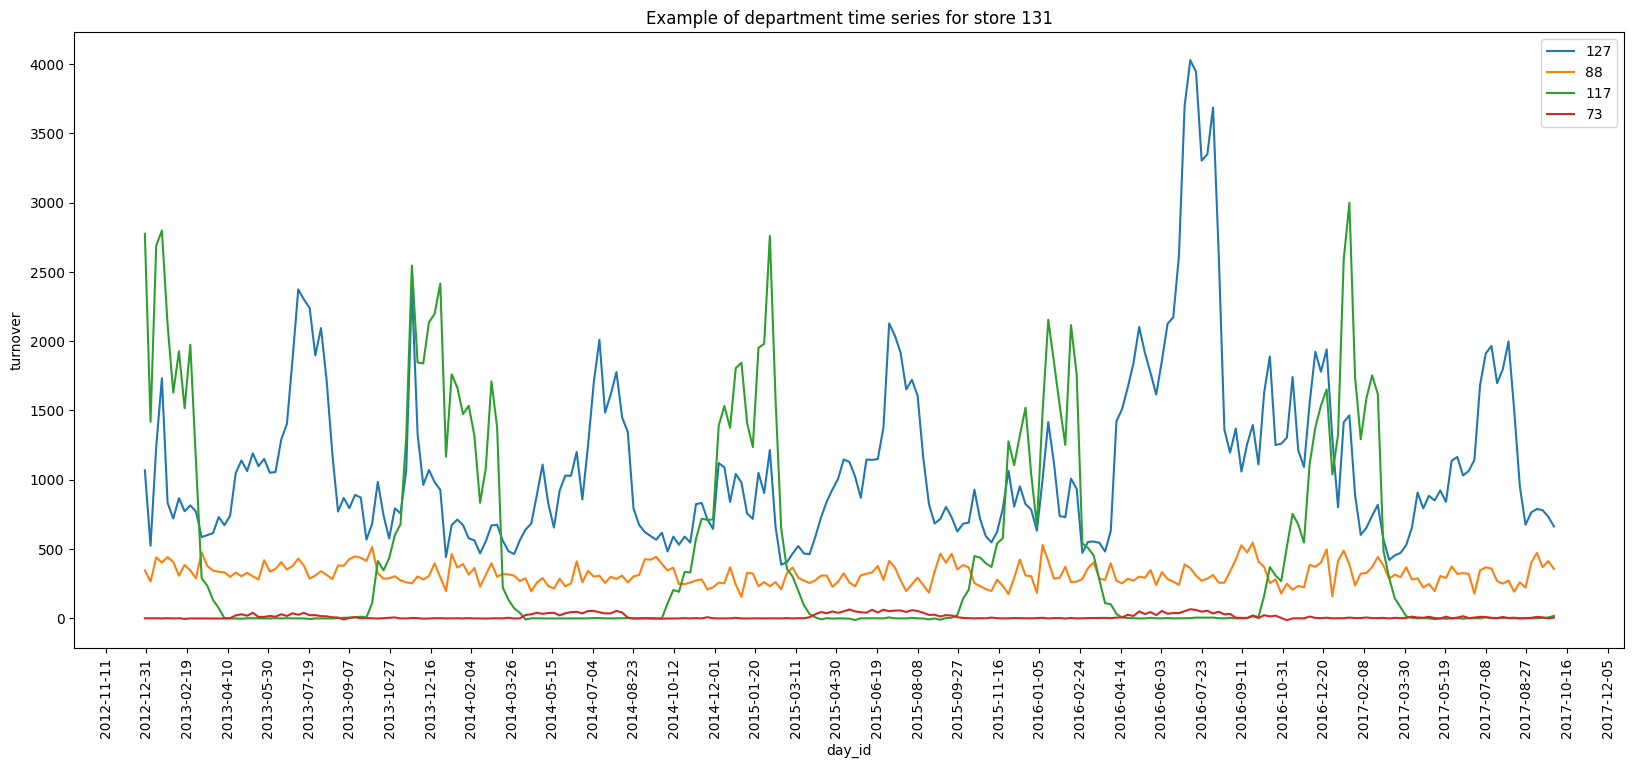

In [8]:
# Detection of outliers with IQR
def detect_outliers_iqr(data, window=3):
    rolling = data.rolling(window=window)
    print(rolling)
    Q1 = rolling.quantile(0.25)
    Q3 = rolling.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)


train.index = pd.to_datetime(train.day_id)

for bu in train['but_num_business_unit'].unique().tolist():
    if bu == 131:
        plt.figure(figsize=(20,8))
        for dep in train[train.but_num_business_unit == bu]['dpt_num_department'].unique().tolist():
            outliers = detect_outliers_iqr(train[(train.but_num_business_unit == bu) & (train.dpt_num_department == dep)]['turnover'])            
            sns.lineplot(data=train[(train.but_num_business_unit == bu) & (train.dpt_num_department == dep)]['turnover'], 
            label=dep,
            legend=False)
        plt.xticks(rotation=90)
        #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
        plt.legend()
        plt.title('Example of department time series for store ' + str(bu))
        plt.show()

In [9]:
# Put day_id as index
train["year"] = train.day_id.dt.year
train["month"] = train.day_id.dt.month
train["week"] = train.day_id.dt.isocalendar().week
test["year"] = test.day_id.dt.year
test["month"] = test.day_id.dt.month
test["week"] = test.day_id.dt.isocalendar().week


Merge the information dataset on **but_num_business_unit** 

In [10]:
train_feat = train.merge(bu_feat, how='left', on='but_num_business_unit')
display_dataframe(train_feat)

,day_id,but_num_business_unit,dpt_num_department,turnover,year,month,week,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,2017-09-30,64,127,580.308443,2017,9,39,16400,45.625172,0.111939,70,10
1,2017-09-30,119,127,1512.995918,2017,9,39,74100,46.195037,6.254448,51,4
2,2017-09-30,4,88,668.593556,2017,9,39,6600,43.600994,7.078160,55,10
3,2017-09-30,425,127,0.000000,2017,9,39,59000,50.617921,3.084186,33,3
4,2017-09-30,513,73,0.000000,2017,9,39,33610,44.717366,-0.733429,33,3
...,...,...,...,...,...,...,...,...,...,...,...,...
277714,2012-12-29,131,73,1.461821,2012,12,52,69760,45.822363,4.767741,8,4
277715,2012-12-29,237,127,759.283046,2012,12,52,13500,43.430995,5.047929,71,10
277716,2012-12-29,129,117,1716.399152,2012,12,52,14124,49.154936,-0.287441,30,6
277717,2012-12-29,468,127,1307.357057,2012,12,52,94320,48.757857,2.385381,75,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277719 entries, 0 to 277718
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   day_id                 277719 non-null  datetime64[ns]
 1   but_num_business_unit  277719 non-null  int64         
 2   dpt_num_department     277719 non-null  int64         
 3   turnover               277719 non-null  float64       
 4   year                   277719 non-null  int32         
 5   month                  277719 non-null  int32         
 6   week                   277719 non-null  UInt32        
 7   but_postcode           277719 non-null  int64         
 8   but_latitude           277719 non-null  float64       
 9   but_longitude          277719 non-null  float64       
 10  but_region_idr_region  277719 non-null  int64         
 11  zod_idr_zone_dgr       277719 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(3),

None

,day_id,but_num_business_unit,dpt_num_department,turnover,year,month,week,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
count,277719,277719.000000,277719.000000,277719.000000,277719.000000,277719.000000,277719.0,277719.000000,277719.000000,277719.000000,277719.000000,277719.000000
mean,2015-06-17 04:59:05.517591808,294.199464,101.288832,561.818472,2014.974147,6.336156,25.755116,51772.546570,47.024064,2.628933,56.017665,8.370151
min,2012-12-29 00:00:00,1.000000,73.000000,-69.791165,2012.000000,1.000000,1.0,1100.000000,41.954300,-4.436446,2.000000,1.000000
25%,2014-04-05 00:00:00,81.000000,88.000000,11.785140,2014.000000,3.000000,13.0,31150.000000,44.940409,0.638869,30.000000,4.000000
50%,2015-07-04 00:00:00,204.000000,88.000000,232.724186,2015.000000,6.000000,26.0,57200.000000,47.433276,2.599206,64.000000,6.000000
75%,2016-09-10 00:00:00,427.000000,127.000000,676.655825,2016.000000,9.000000,38.0,74500.000000,48.892725,4.867583,72.000000,10.000000
max,2017-09-30 00:00:00,1887.000000,127.000000,1000000.000000,2017.000000,12.000000,53.0,98000.000000,51.050275,8.796100,178.000000,72.000000
std,NaN,291.664511,21.667318,2113.229765,1.392336,3.366234,14.754298,26220.036876,2.332844,2.790672,39.884967,11.083311


day_id                   0
but_num_business_unit    0
dpt_num_department       0
turnover                 0
year                     0
month                    0
week                     0
but_postcode             0
but_latitude             0
but_longitude            0
but_region_idr_region    0
zod_idr_zone_dgr         0
dtype: int64

np.int64(0)

day_id                      249
but_num_business_unit       322
dpt_num_department            4
turnover                 226655
year                          6
month                        12
week                         53
but_postcode                308
but_latitude                322
but_longitude               322
but_region_idr_region        29
zod_idr_zone_dgr              8
dtype: int64

**a. Which department made the highest turnover in 2016?** 

In [11]:
df_dep = train_feat[(train_feat.day_id >= pd.to_datetime("2016-01-01")) & (train_feat.day_id <= pd.to_datetime("2016-12-31"))].groupby(['but_num_business_unit'], as_index=False).aggregate({'dpt_num_department': 'nunique'})
df_dep[df_dep.dpt_num_department < 4]

,but_num_business_unit,dpt_num_department
198,357,1
203,379,1
205,394,2
206,395,1
211,425,3
215,436,1


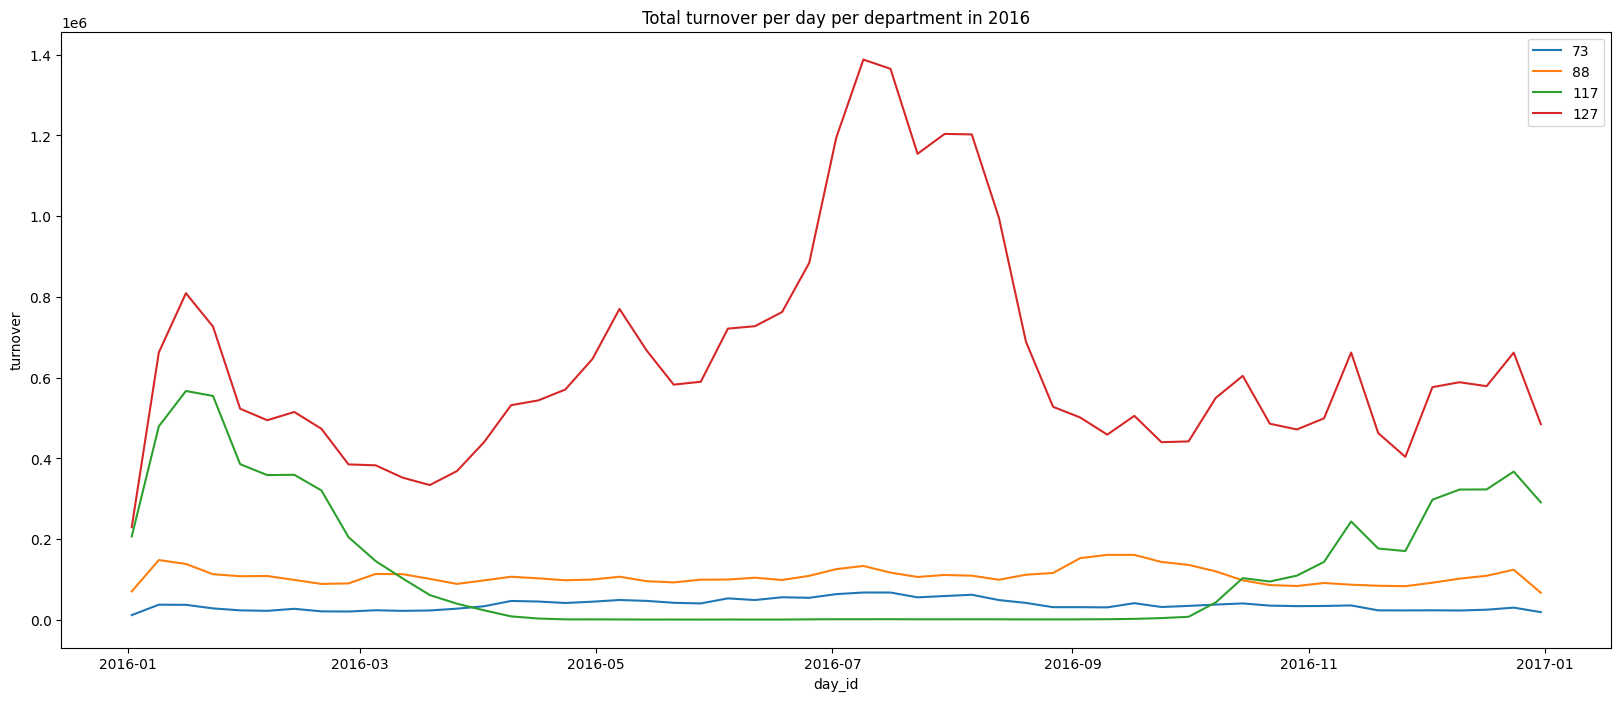

In [12]:
df_dep = train_feat[(train_feat.day_id >= pd.to_datetime("2016-01-01")) & (train_feat.day_id <= pd.to_datetime("2016-12-31"))].groupby(['day_id', 'dpt_num_department'], as_index=False).aggregate({'turnover': 'sum'})
df_dep.index = pd.to_datetime(df_dep.day_id)

plt.figure(figsize=(20,8))
for dep in df_dep['dpt_num_department'].unique().tolist():
    sns.lineplot(data=df_dep[df_dep.dpt_num_department == dep]['turnover'], 
    label=dep,
    legend=False)

plt.title('Total turnover per day per department in 2016')
plt.legend()
plt.show()

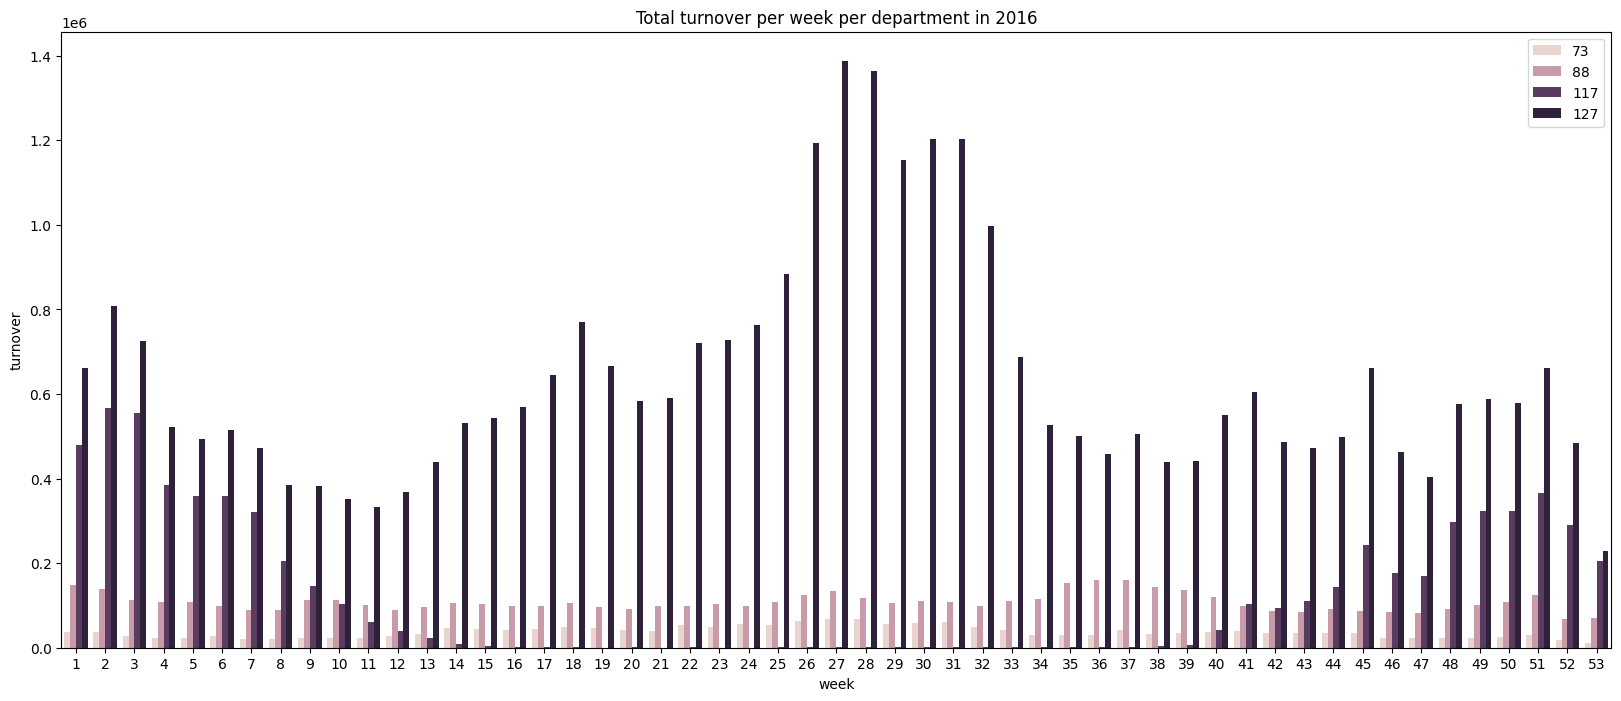

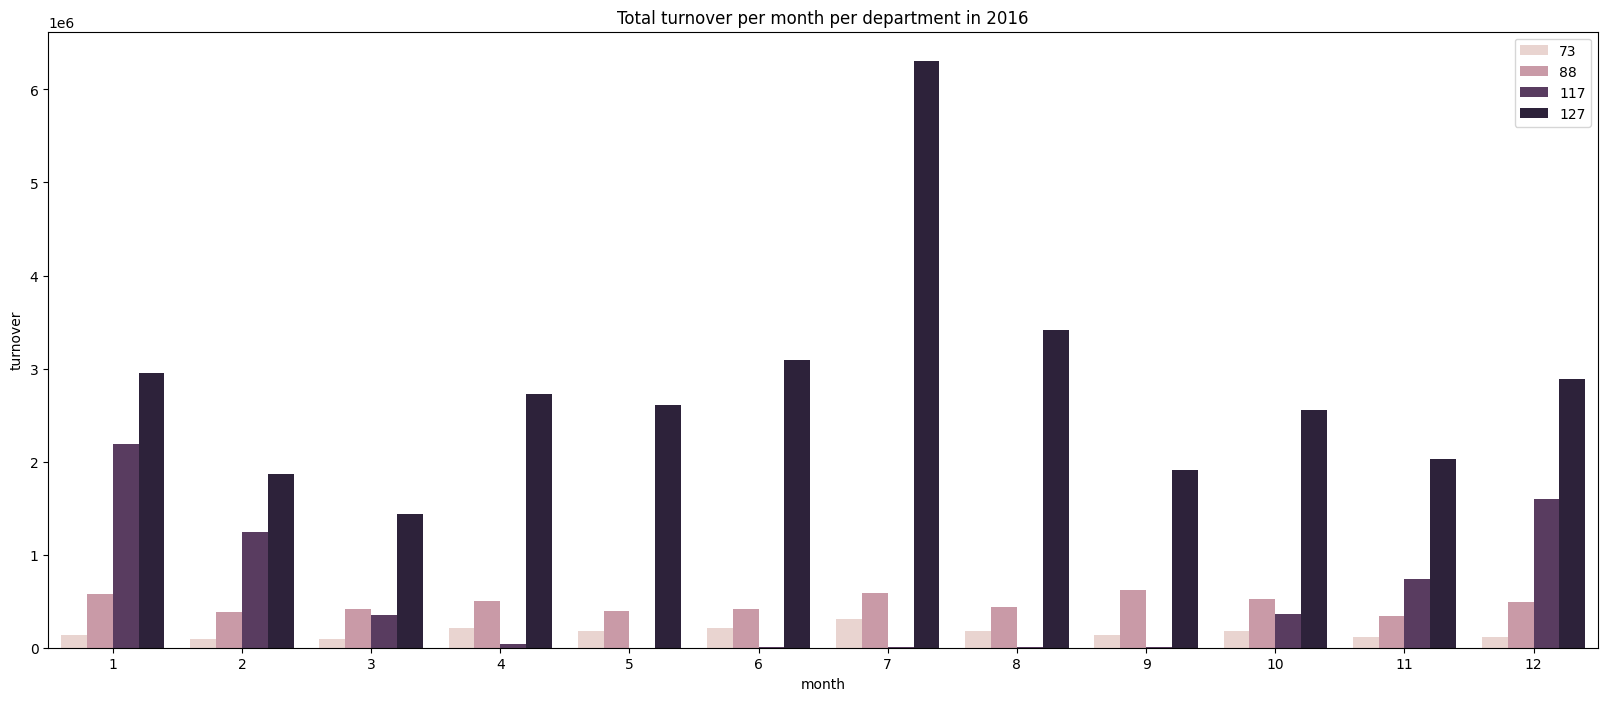

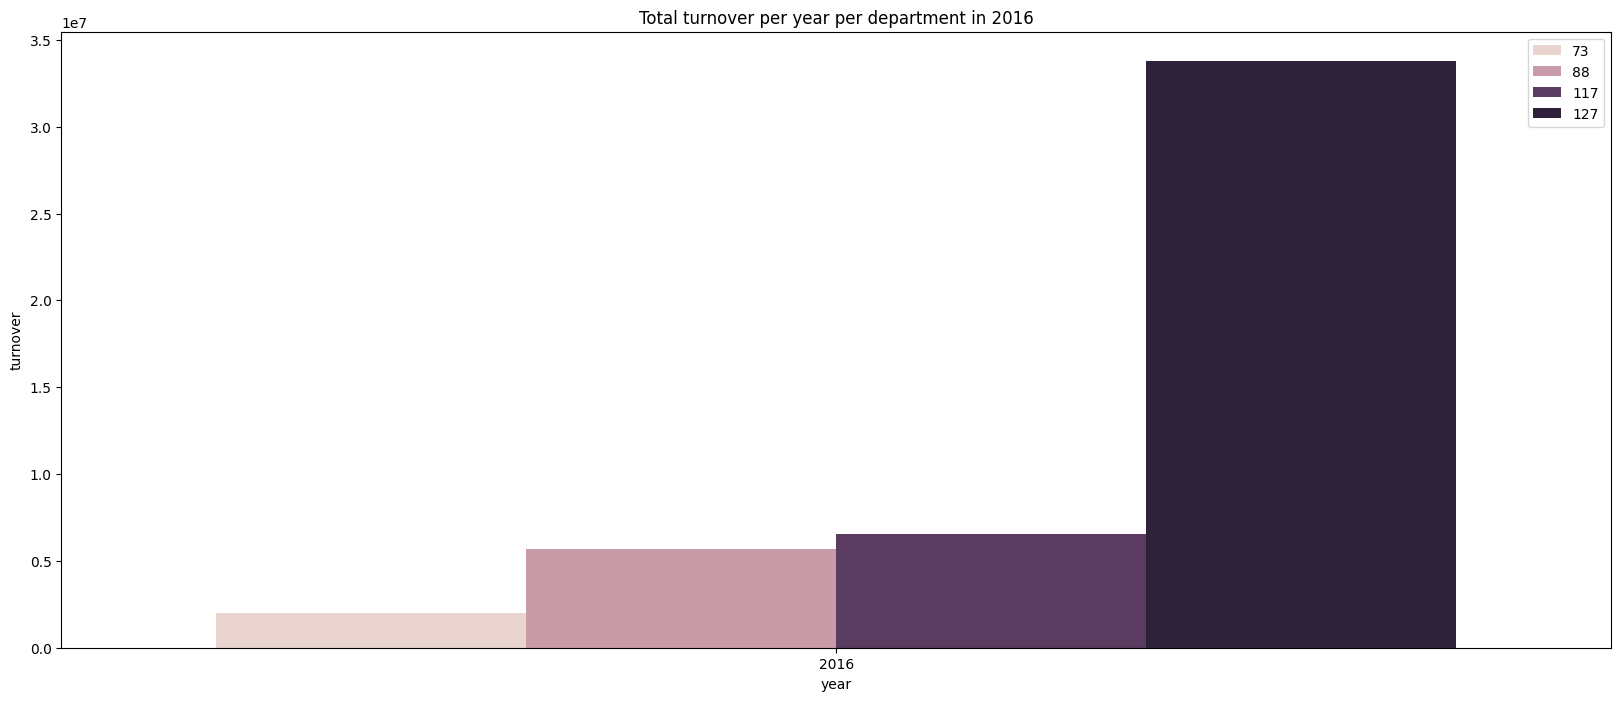

In [13]:
for freq in ['week', 'month', 'year']:
    df_dep = train_feat[(train_feat.day_id >= pd.to_datetime("2016-01-01")) & (train_feat.day_id <= pd.to_datetime("2016-12-31"))].groupby([freq, 'dpt_num_department'], as_index=False).aggregate({'turnover': 'sum'})
    plt.figure(figsize=(20,8))
    sns.barplot(data=df_dep, 
        x=freq,
        y='turnover',
        hue='dpt_num_department',
        )
    plt.title('Total turnover per ' + freq + ' per department in 2016')
    plt.legend()
    plt.show()

The department 127 made the highest turnover in 2016 with ~35M. 

**b. What are the top 5 week numbers (1 to 53) for department 88 in 2015 in terms of
turnover over all stores?**

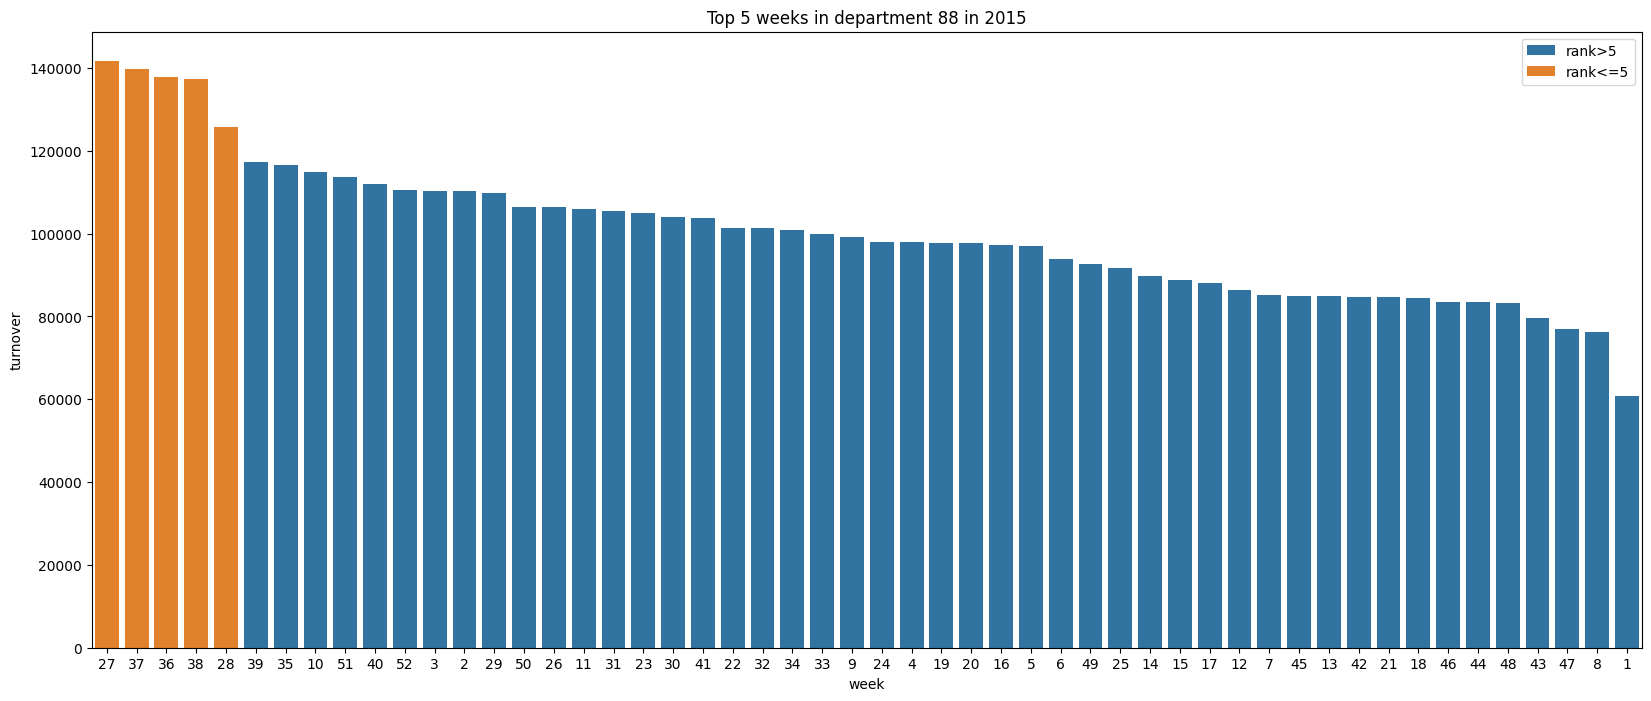

In [14]:
freq ='week'
df_dep = train_feat[(train_feat.dpt_num_department == 88) & (train_feat.year == 2015)].groupby([freq], as_index=False).aggregate({'turnover': 'sum'})
df_dep = df_dep.sort_values(by='turnover', ascending=False)

# Ajouter une colonne 'is_top_5' qui met 1 si le rang est <= 5, sinon 0
df_dep['is_top_5'] = np.where(df_dep['turnover'].rank(method='min', ascending=False) <= 5, 'rank<=5', 'rank>5')

plt.figure(figsize=(20,8))
sns.barplot(data=df_dep, 
    x=freq,
    y='turnover',
    order=df_dep.week,
    hue='is_top_5'
    )
plt.title('Top 5 weeks in department 88 in 2015')
plt.legend()
plt.show()

The top 5 weeks for department 88 in 2015 are weeks 27, 37, 36, 38 and 28.

**c. What was the top performer store in 2014?**

,week,but_num_business_unit,turnover
361,2,118,12810.990594
1749,7,189,12221.772517
284,2,17,11425.670981
631,3,118,11411.068784
14024,52,232,11107.563506


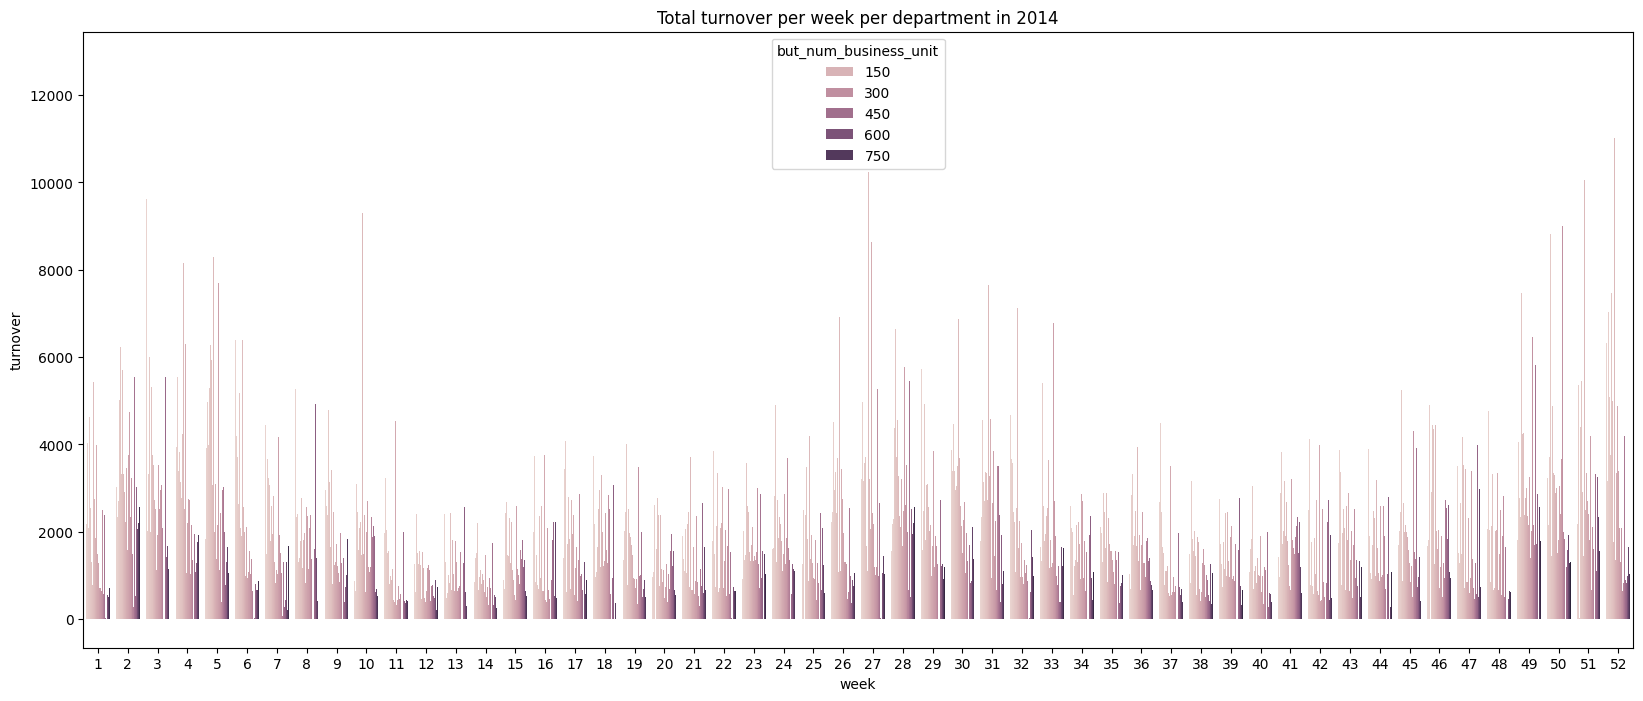

,month,but_num_business_unit,turnover
3085,12,121,41643.254991
399,2,189,41397.083004
3083,12,118,39872.265553
3121,12,189,39363.769064
91,1,118,39271.387351


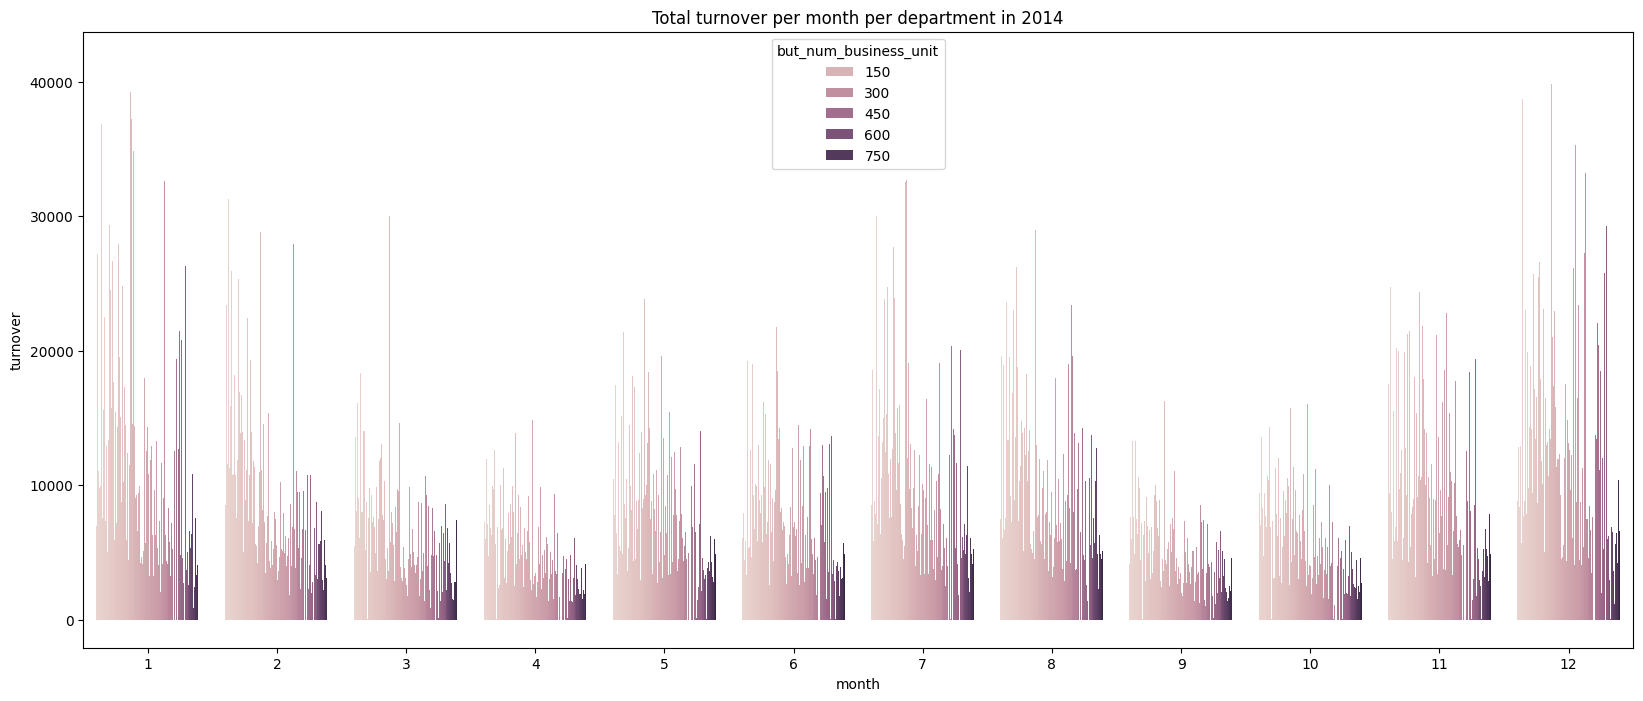

,year,but_num_business_unit,turnover
93,2014,121,327806.356464
14,2014,17,311496.294164
91,2014,118,301938.962571
129,2014,189,296147.653207
84,2014,100,285379.195910


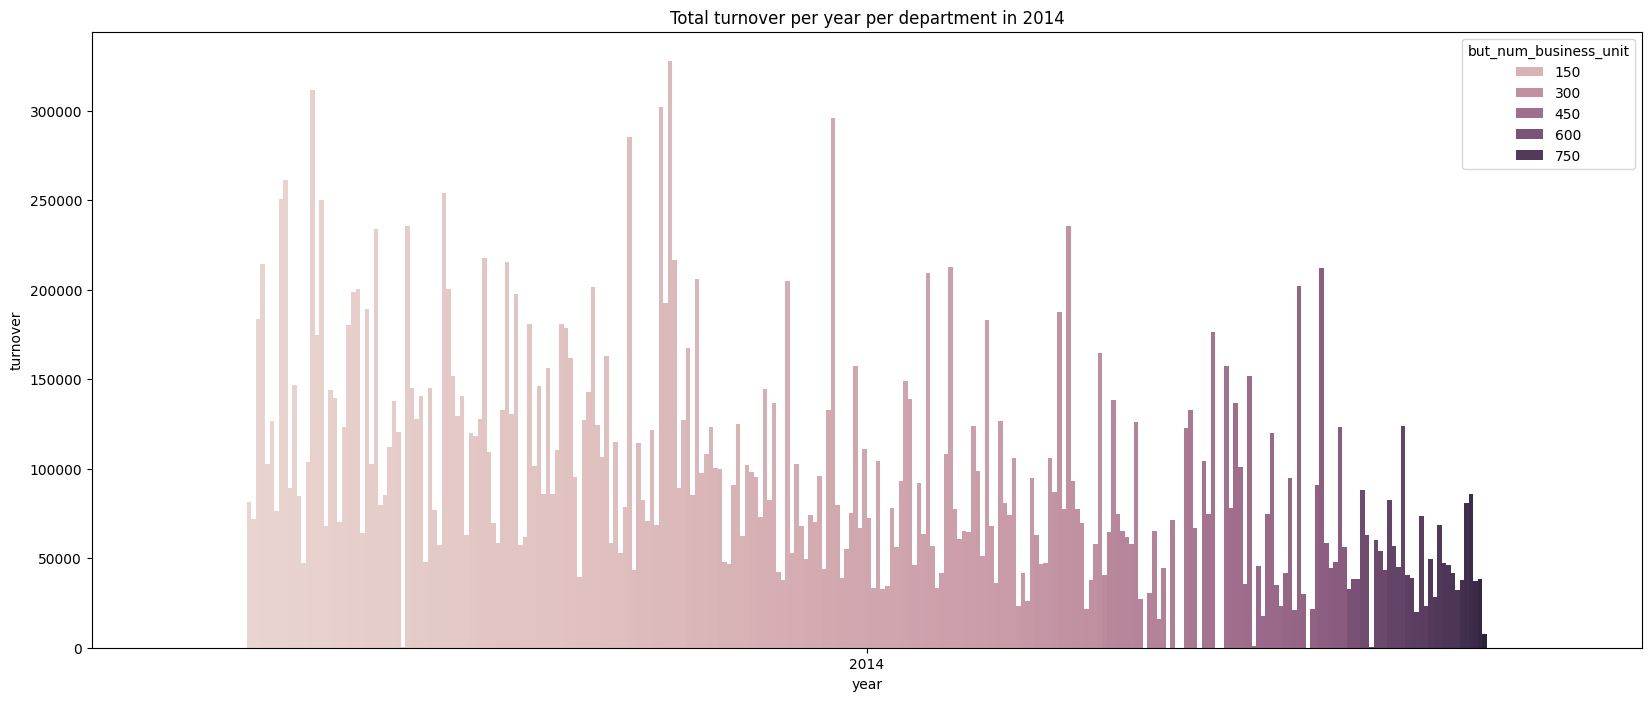

In [15]:
for freq in ['week', 'month', 'year']:
    df_dep = train_feat[(train_feat.year == 2014) & (train_feat['but_num_business_unit'].isin(train_feat.but_num_business_unit.unique().tolist()))].groupby([freq, 'but_num_business_unit'], as_index=False).aggregate({'turnover': 'sum'}).sort_values(by='turnover', ascending=False)
    plt.figure(figsize=(20,8))
    display(df_dep.head(5))
    sns.barplot(data=df_dep, 
        x=freq,
        y='turnover',
        hue='but_num_business_unit',
        )
    plt.title('Total ' + 'turnover' + ' per ' + freq + ' per department in 2014')
    # plt.legend()
    plt.show()


In 2014 the top performer store was the 121 with ~327806.

**d. Based on sales can you guess what kind of sport represents departement 73?**

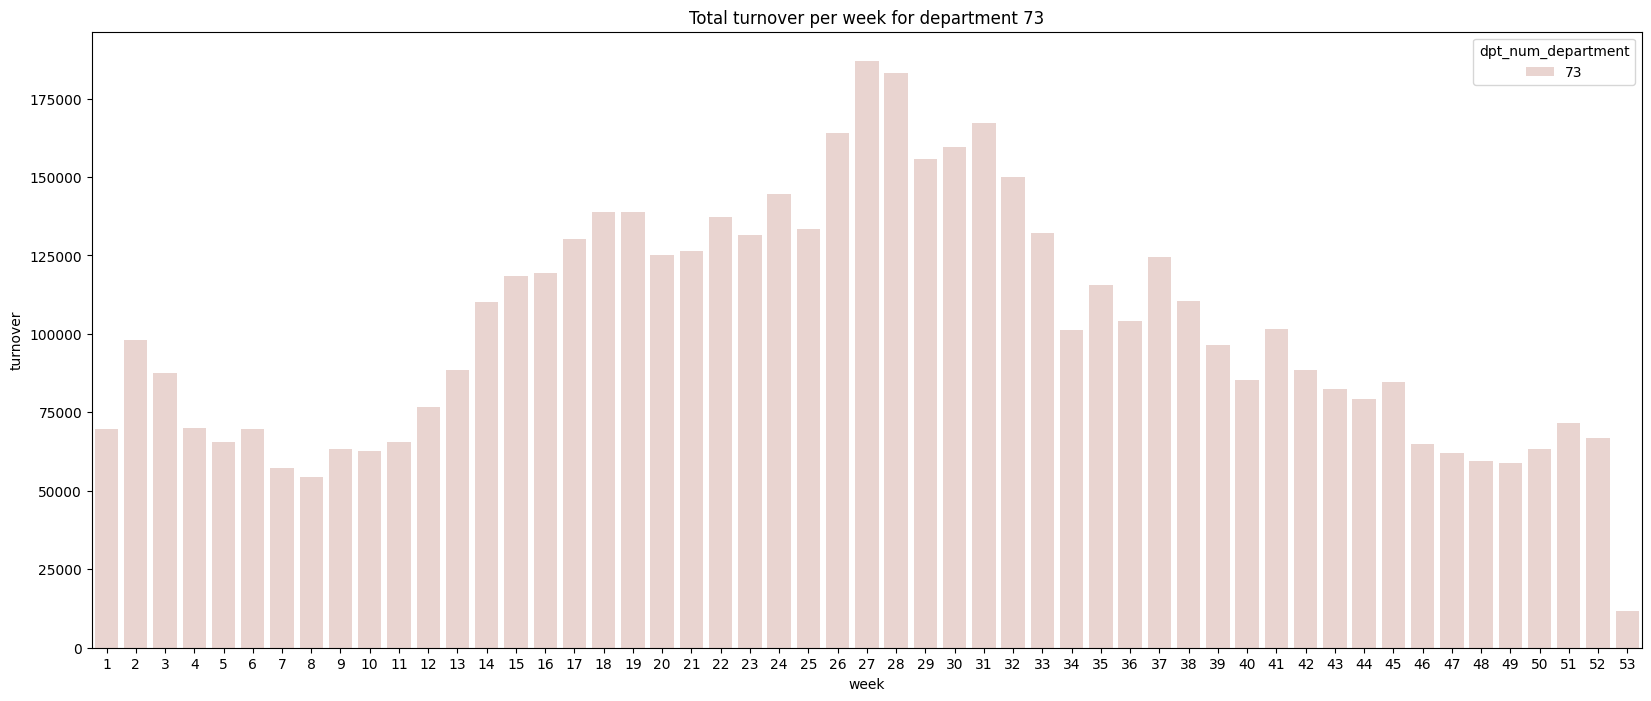

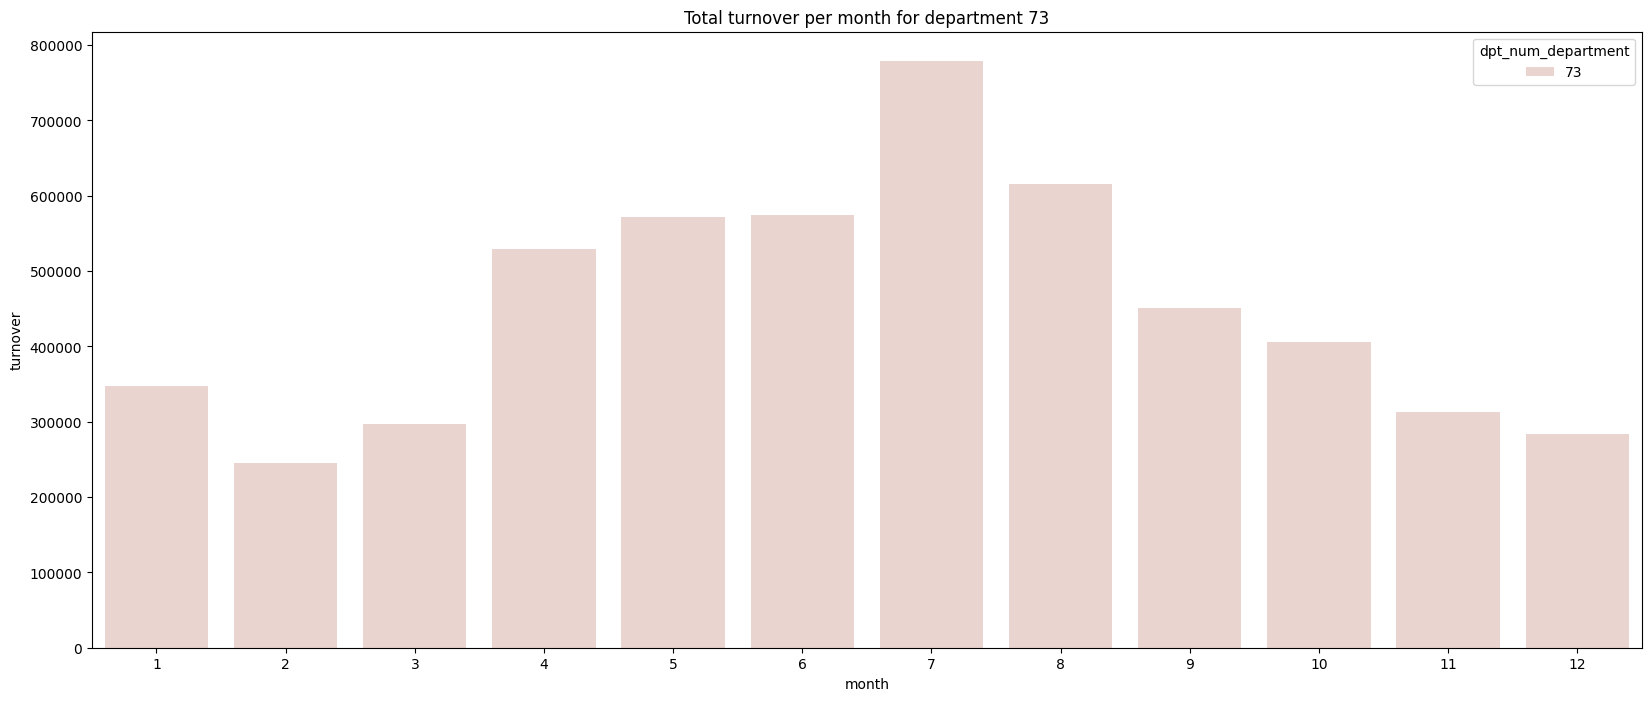

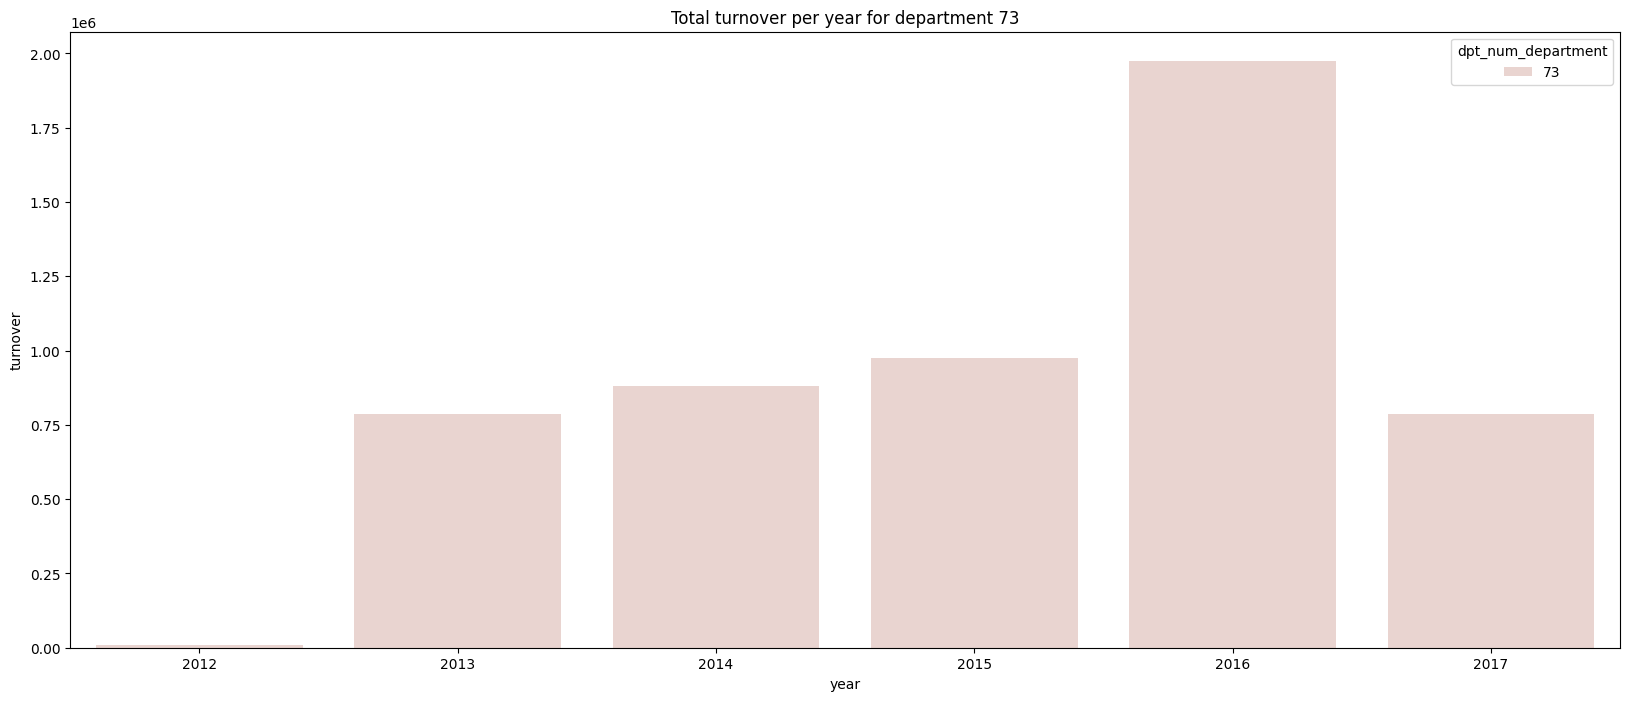

In [16]:
for freq in ['week', 'month', 'year']:
    df_dep = train[(train['dpt_num_department'].isin([73]))].groupby([freq, 'dpt_num_department'], as_index=False).aggregate({'turnover': 'sum'}).sort_values(by='turnover')
    plt.figure(figsize=(20,8))
    sns.barplot(data=df_dep, 
        x=freq,
        y='turnover',
        hue='dpt_num_department',
        )
    plt.title('Total ' + 'turnover' + ' per ' + freq + ' for department '+ str(73))
    # plt.legend()
    plt.show()

Total number of stores selling 117: 316


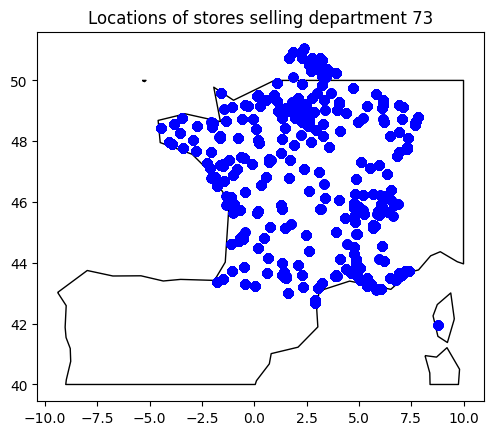

In [17]:
# Location of stores with dep 117
df_ = train_feat[train_feat.dpt_num_department == 73]
print("Total number of stores selling 117:", len(df_.but_num_business_unit.unique().tolist()))
gdf = geopandas.GeoDataFrame(df_, geometry=geopandas.points_from_xy(df_.but_longitude, df_.but_latitude), crs="EPSG:4326")
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.clip([-30, 40, 10, 50]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="blue")
plt.title('Locations of stores selling department ' + str(73))
plt.show()

According to the results, the department 73 is mostly played during summmer and peaked in 2016. The localization of stores is in France but doesn't give any indication of whihc sport it could be except that it's commonly practiced all across the country. But this year in France, we had the Euro 2016 football cup, which could drive the sales of football kits. 

**e. Based on sales can you guess what kind of sport represents departement 117?**

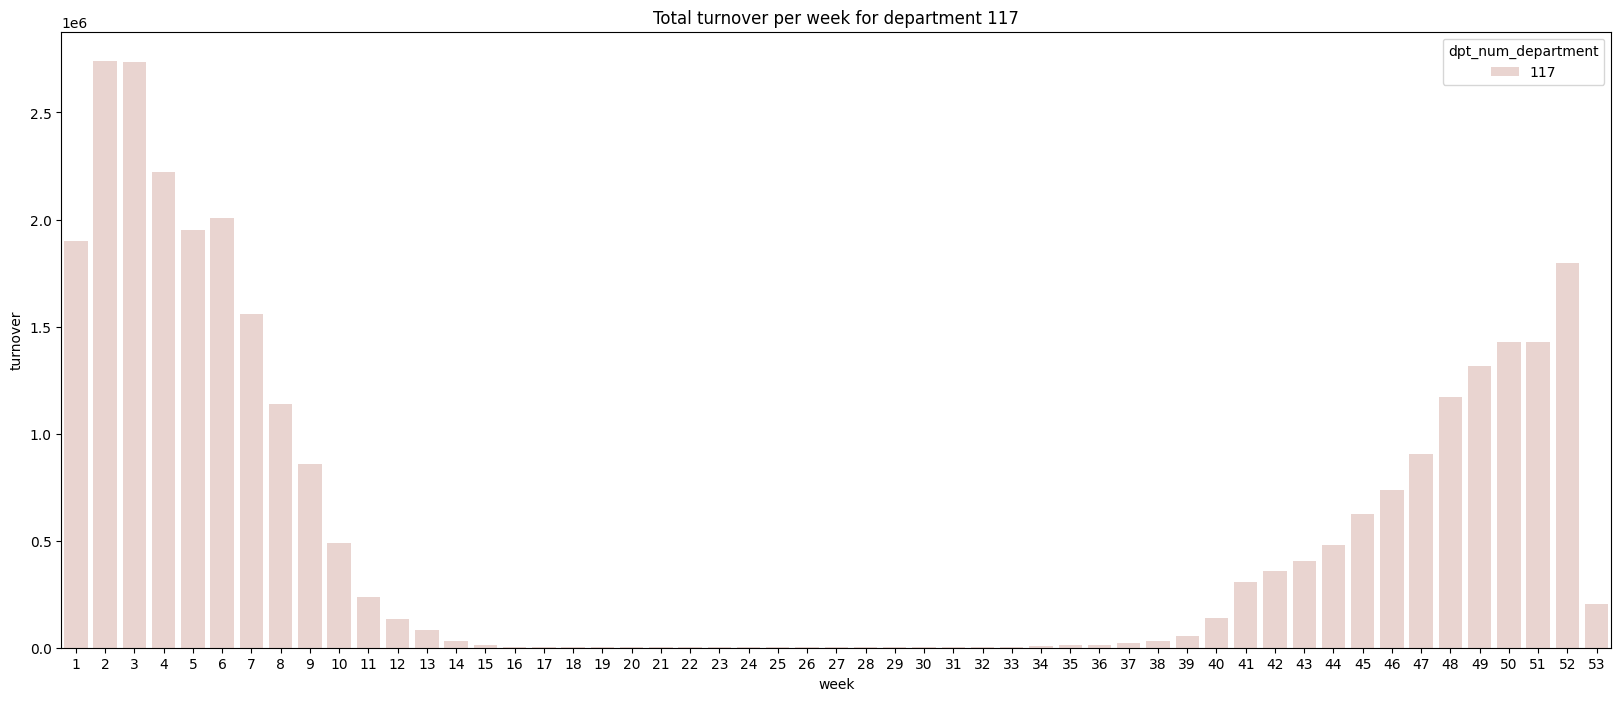

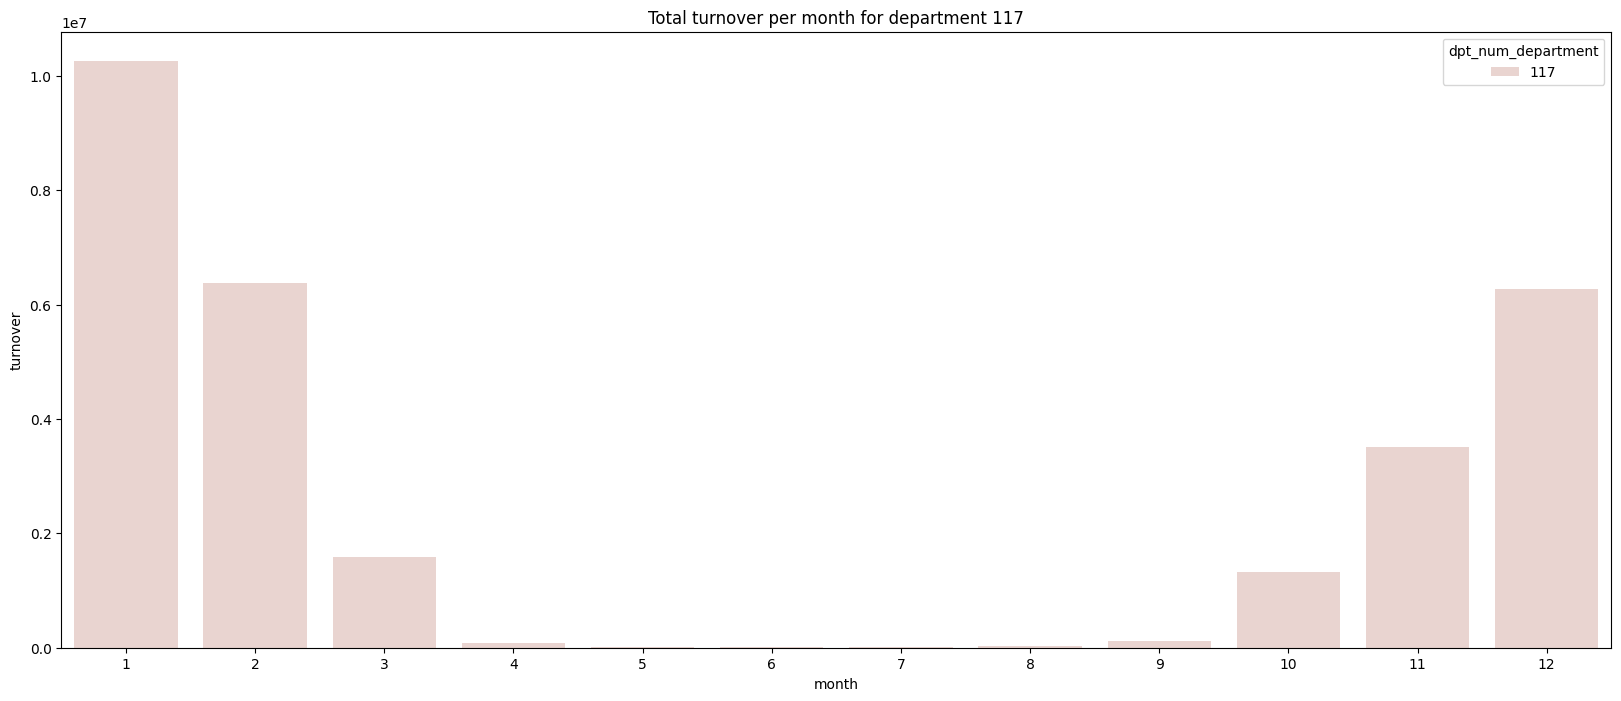

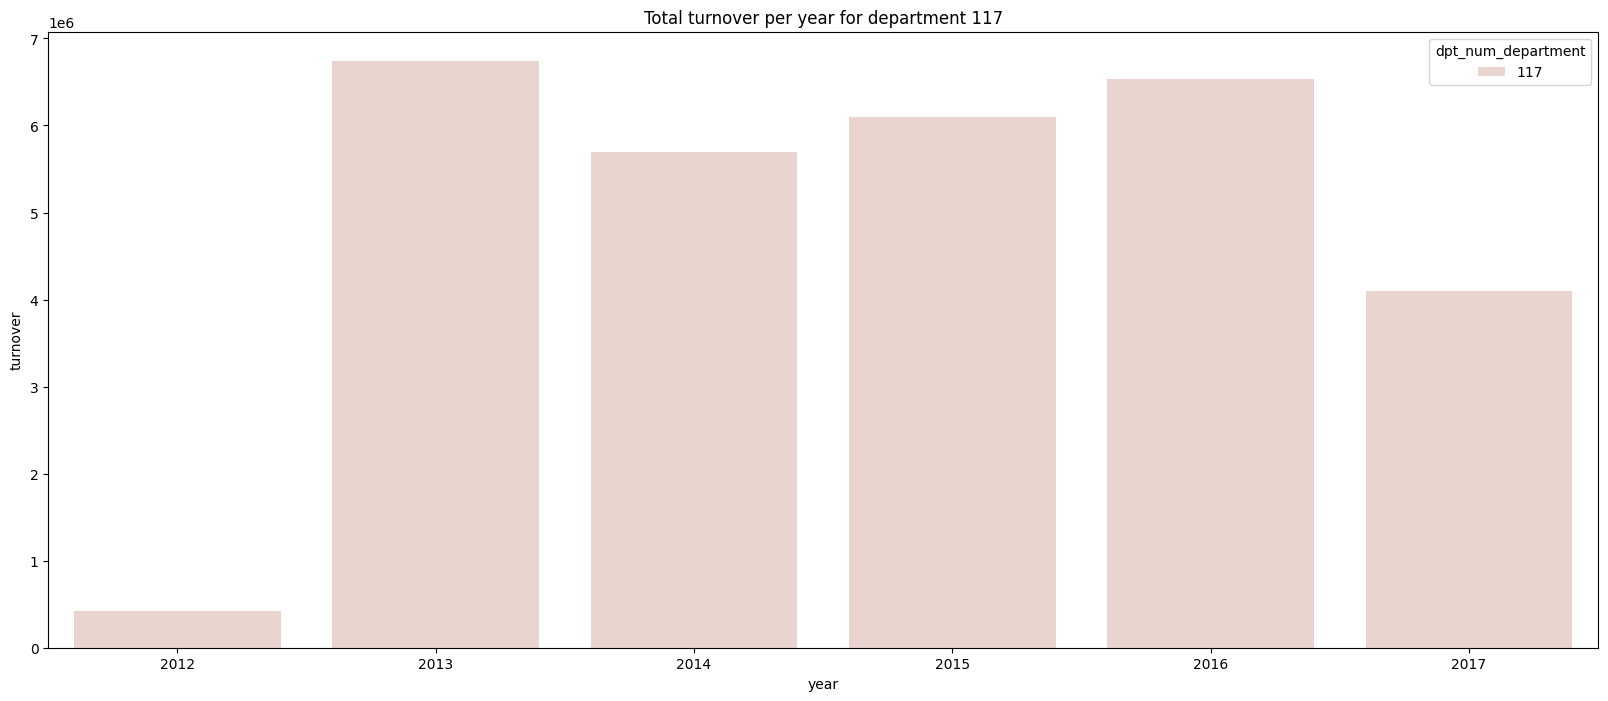

In [18]:
# Seasonal plot for department 117
for freq in ['week', 'month', 'year']:
    df_dep = train[(train['dpt_num_department'].isin([117]))].groupby([freq, 'dpt_num_department'], as_index=False).aggregate({'turnover': 'sum'}).sort_values(by='turnover')
    plt.figure(figsize=(20,8))
    sns.barplot(data=df_dep, 
        x=freq,
        y='turnover',
        hue='dpt_num_department',
        )
    plt.title('Total ' + 'turnover' + ' per ' + freq + ' for department '+ str(117))
    plt.show()

Total number of stores selling 117: 315


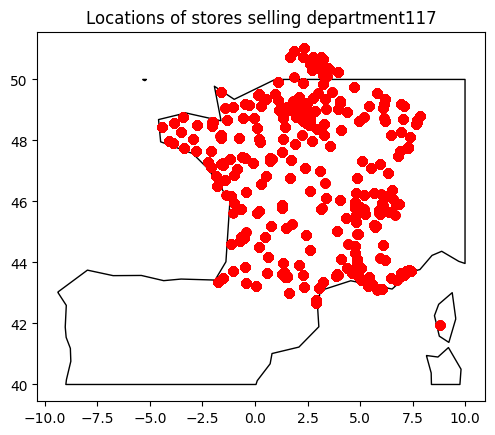

In [19]:
# Localisation of stores with dep 117
df_ = train_feat[train_feat.dpt_num_department == 117]
print("Total number of stores selling 117:", len(df_.but_num_business_unit.unique().tolist()))
gdf = geopandas.GeoDataFrame(df_, geometry=geopandas.points_from_xy(df_.but_longitude, df_.but_latitude), crs="EPSG:4326")
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.clip([-30, 40, 10, 50]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red")
plt.title('Locations of stores selling department' + str(117))
plt.show()

According to the results, the department 117 is mostly used during winter. The localization of stores is in France but doesn't give any indication of which sport it could be except that it's commonly practiced all across the country. We can think about winter activities like ski or snowboarding.

**f. What other insights can you draw from the data? Provide plots and figures if
needed.**

In [20]:
#TODO

# 3. Multi-step forecasting

**a. Build an estimator able to predict the turnover of test.csv.gz data.**

In [21]:
# Merge but infos on test set
test_feat = test.merge(bu_feat, how='left', on='but_num_business_unit')

In [41]:
train_feat.index = pd.to_datetime(train_feat.day_id)
test_feat.index = pd.to_datetime(test_feat.day_id)

target_column = 'turnover'
target_date = test_feat.index.min()

df_temp = pd.concat([train_feat, test_feat]).sort_index(ascending=True)

# Drop intermediate features
df_temp = df_temp.drop(columns=['but_postcode', 'but_latitude', 'but_longitude', 'day_id'])

# Create train & test sets
df_train = df_temp[df_temp.index < target_date]
df_test = df_temp[df_temp.index >= target_date]


In [30]:
df_train.isna().sum()

but_num_business_unit    0
dpt_num_department       0
turnover                 0
year                     0
month                    0
week                     0
but_region_idr_region    0
zod_idr_zone_dgr         0
dtype: int64

In [31]:
#modeling 
X = df_train.drop(columns=[target_column])
y = df_train[target_column]

grid = { 
    'n_estimators': [50, 100, 300],
    'max_depth' : [3,5,10,30],
    'random_state' : [42]
}

# Time Series Split
tscv = TimeSeriesSplit(n_splits=4)

# Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv=tscv, scoring='neg_root_mean_squared_error')
CV_rfr.fit(X, y)
display(CV_rfr.cv_results_)

{'mean_fit_time': array([ 1.80445552,  3.80846822,  2.84758496,  5.60934258,  5.06447506,
        10.1157639 , 10.18802154, 20.37718868]),
 'std_fit_time': array([0.61965346, 1.36930597, 0.98582911, 1.94291949, 1.78929806,
        3.576823  , 3.65579045, 7.0490706 ]),
 'mean_score_time': array([0.06030762, 0.12160635, 0.09791553, 0.19233847, 0.18101418,
        0.36749065, 0.61171043, 1.2519033 ]),
 'std_score_time': array([0.00182736, 0.00559759, 0.00056636, 0.00251055, 0.00348699,
        0.01780355, 0.01770842, 0.04115963]),
 'param_max_depth': masked_array(data=[3, 3, 5, 5, 10, 10, 30, 30],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100, 50, 100, 50, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'param_random_state': masked_array(data=[42, 42, 42, 42, 42, 42, 42, 42],
              mask=[False, False, 

In [42]:
df_temp['y_hat'] = CV_rfr.predict(df_temp.drop(columns=[target_column]))
df_temp.head(30)

,but_num_business_unit,dpt_num_department,turnover,year,month,week,but_region_idr_region,zod_idr_zone_dgr,y_hat
day_id,,,,,,,,,
2012-12-29,132,73,23.243913,2012,12,52,4,4,108.981252
2012-12-29,4,127,1932.630808,2012,12,52,55,10,1242.908392
2012-12-29,255,73,0.000000,2012,12,52,51,4,55.095998
2012-12-29,812,73,43.619478,2012,12,52,7,6,75.653213
2012-12-29,24,73,5.237134,2012,12,52,65,4,154.323785
2012-12-29,201,127,825.383999,2012,12,52,71,10,803.163452
2012-12-29,5,73,78.010097,2012,12,52,55,10,184.143654
2012-12-29,195,73,0.000000,2012,12,52,4,4,55.095998
2012-12-29,216,73,288.191911,2012,12,52,7,6,97.939914


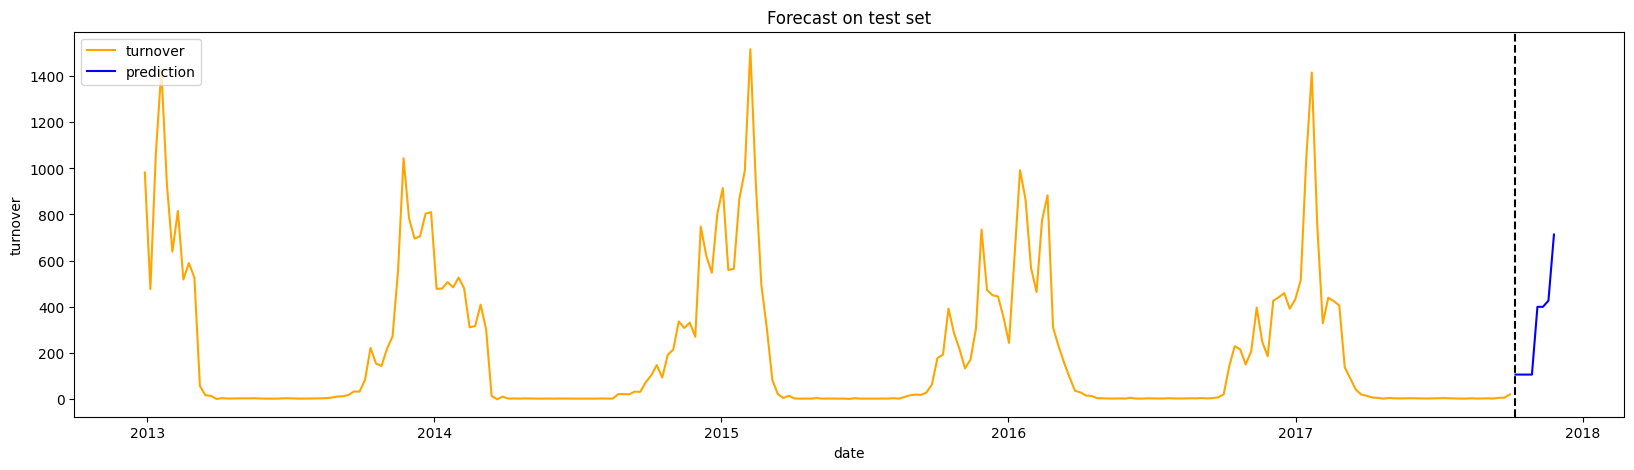

In [43]:
# plot residuals
dep = 117
but = 336
df_temp_ = df_temp[(df_temp.dpt_num_department == dep) & (df_temp.but_num_business_unit == but)]
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_temp_[df_temp_.index < pd.to_datetime(target_date)]['turnover'], 
                label=target_column,
                color='orange',
                legend=False)
sns.lineplot(data=df_temp_[df_temp_.index >= pd.to_datetime(target_date)]['y_hat'], 
                label='prediction',
                color='blue',
                legend=False)
plt.axvline(target_date, color="k", linestyle="--")
plt.xlabel('date') 
plt.title('Forecast on test set')
plt.legend(loc='upper left')
plt.show() 


**b. Which metric would you use to evaluate your predictions and why?**

##### 1. Penalty for Large Errors:
**Sensitive to Large Errors:** The RMSE metric squares the errors before averaging them. This means that larger errors have a disproportionately high impact on the RMSE, making it very sensitive to large deviations. This can be beneficial when you want to ensure that your model penalizes large errors more significantly. This would be useful to managers to not over-delivering stocks to one store. 

##### 2. Interpretable Scale:
**Same Units:** RMSE has the same units as the target variable, which makes it easy to interpret in the context of the original data. For instance, if you are predicting house prices in dollars, the RMSE will also be in dollars, giving a clear sense of the typical prediction error. As managers are the decision makers, they need to understand also who the model perform and its forecasting error in the unit of turnover. 

##### 3. Standard Metric:
**Widely Used:** RMSE is one of the most common metrics for regression tasks. Its widespread use makes it easy to compare results across different models and studies.

**c. Build an end-to-end pipeline from data processing to results exposition.**

In [ ]:
def pipeline(train, test, bu_feat):

    train["year"] = train.day_id.dt.year
    train["month"] = train.day_id.dt.month
    train["week"] = train.day_id.dt.isocalendar().week
    test["year"] = test.day_id.dt.year
    test["month"] = test.day_id.dt.month
    test["week"] = test.day_id.dt.isocalendar().week

    train_feat = train.merge(bu_feat, how='left', on='but_num_business_unit')
    test_feat = test.merge(bu_feat, how='left', on='but_num_business_unit')

    train_feat.index = pd.to_datetime(train_feat.day_id)
    test_feat.index = pd.to_datetime(test_feat.day_id)

    target_column = 'turnover'
    target_date = test_feat.index.min()

    df_temp = pd.concat([train_feat, test_feat]).sort_index(ascending=True)

    # Drop intermediate features
    df_temp = df_temp.drop(columns=['but_postcode', 'but_latitude', 'but_longitude', 'day_id'])

    # Create train & test sets
    df_train = df_temp[df_temp.index < target_date]
    df_test = df_temp[df_temp.index >= target_date]

    #modeling 
    X = df_train.drop(columns=[target_column])
    y = df_train[target_column]

    grid = { 
        'n_estimators': [50, 100, 300],
        'max_depth' : [3,5,10,30],
        'random_state' : [42]
    }

    # Time Series Split
    tscv = TimeSeriesSplit(n_splits=5)

    # Grid Search function
    CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv=tscv, scoring='neg_root_mean_squared_error')
    CV_rfr.fit(X, y)

    df_temp['y_hat'] = CV_rfr.predict(df_temp.drop(columns=[target_column]))

    return df_temp


# Additional steps 

List of steps that could help in this project: 
- Check outliers with other method like z-score
- Remove some store/department outliers which are not relenvant for the model training
- Add relevant features like holidays, sports events, sports trends... That could help to forecast across time. 
- Build a multi-model pipeline with a model for each store/department
- One of the main constraint of tree models are the limitations of training range, a linear model would be more robust to time series with significant trend over time. 
- Deeper understand correlations between stores 
